In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Practice DataSet from Keggle\\fraud detect.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Exploratory data analysis

In [3]:
num= df.select_dtypes(exclude='object')

In [4]:
print("The number of numerical columns are ",len(num.columns))

The number of numerical columns are  8


Text(0.5, 1.0, 'Outliers')

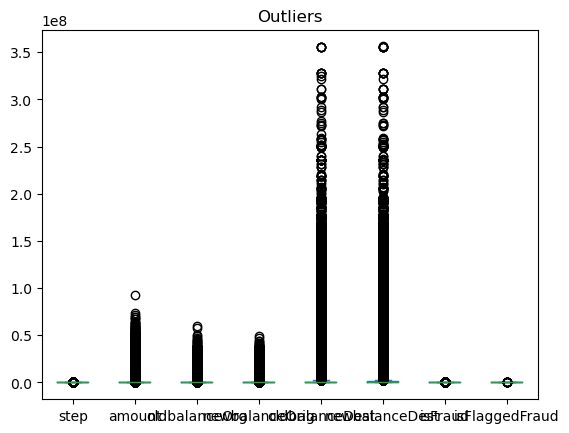

In [5]:
num.plot(kind='box')
plt.title("Outliers")

In [11]:
cat=df.select_dtypes(include='object')

In [12]:
print("The number of categorical columns are ",len(cat.columns))

The number of categorical columns are  3


In [20]:
pd.DataFrame(cat['type'].unique())

,0
0,PAYMENT
1,TRANSFER
2,CASH_OUT
3,DEBIT
4,CASH_IN


#### Categories in the type column.

### Univariate Analysis

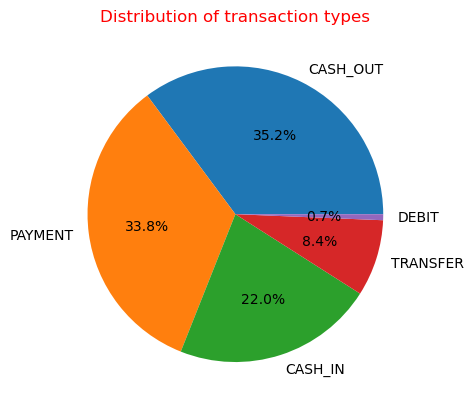

In [24]:
cat['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel(" ")
plt.title("Distribution of transaction types",c='r')
plt.show()

#### The data which we have , most of the transactions are of Cash out and payments transaction.

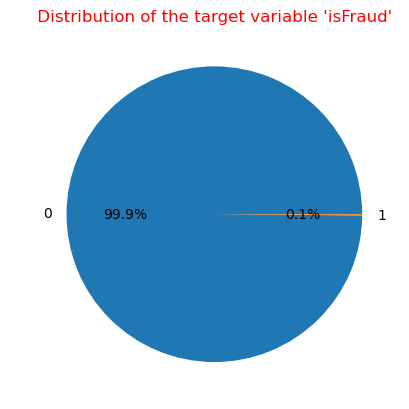

In [35]:
df['isFraud'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel(" ")
plt.title(" Distribution of the target variable 'isFraud' ",c='r')
plt.show()

#### only 0.1% of the total transaction records are fraud.

### Bivariate Analysis

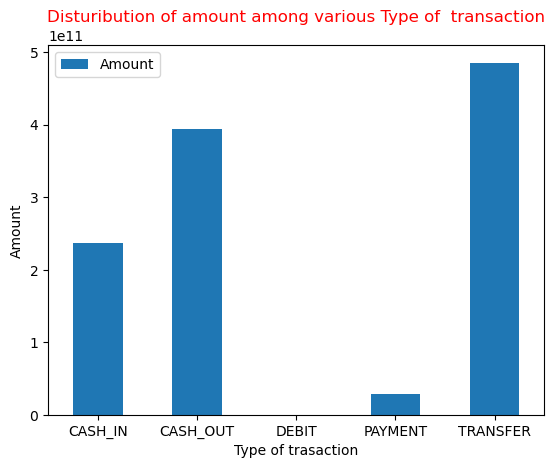

In [21]:
df.groupby(by=['type']).agg(Amount=('amount',np.sum)).plot(kind='bar')
plt.ylabel("Amount")
plt.title("Disturibution of amount among various Type of  transaction",c='r')
plt.xlabel("Type of trasaction")
plt.xticks(rotation=0)
plt.show()

#### Most transactions records are of money Transfer and cash out.

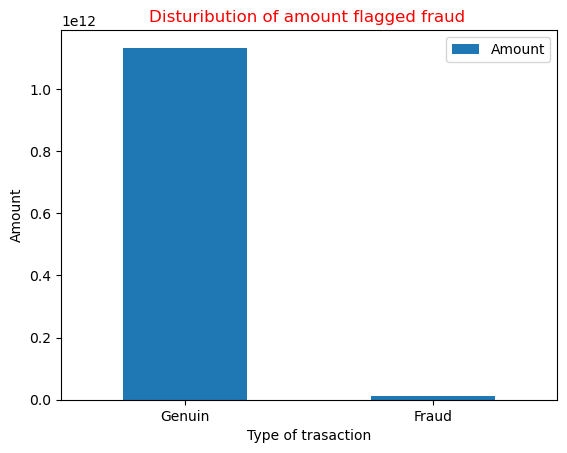

In [28]:
label=['Genuin','Fraud']
df.groupby(by=['isFraud']).agg(Amount=('amount',sum)).plot(kind='bar')
plt.ylabel("Amount")
plt.title("Disturibution of amount flagged fraud ",c='r')
plt.xlabel("Type of trasaction")
plt.xticks([0, 1], label, rotation=0)
plt.show()

#### Very less records for fraud amount is available.

In [32]:
corr = num.corr()

<Axes: >

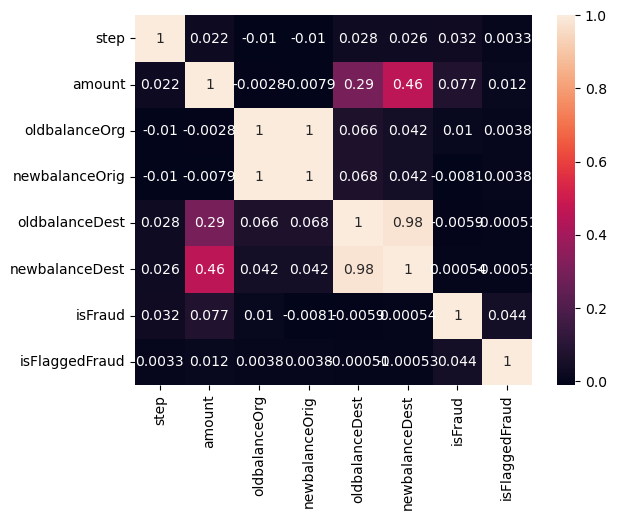

In [35]:
sns.heatmap(data = corr,annot =True)

In [53]:
f_data=df.loc[df['isFraud']==1]
f_data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0


In [46]:
print("Out of ",len(f_data)," records ",len(f_data.loc[(f_data['newbalanceOrig']==0)]),"accounts were completely emptied.")

Out of  8213  records  8053 accounts were completely emptied.


In [52]:
f_data['nameDest'].value_counts()

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: count, Length: 8169, dtype: int64

#### Most of the destination accounts are used once or twice by the scammer.